# 12-Day Programme. Day 4.

The following are answers to the Day 4 requirements for TDI 12-Day programme (https://app.thedataincubator.com/12day.html)  <br /> Dean Howard <owaschuwa@gmail.com> 28-Mar-2022

In [4]:
# Import the data from the City of New York API
!wget -N https://data.cityofnewyork.us/resource/bug8-9f3g.json

--2022-03-28 16:30:43--  https://data.cityofnewyork.us/resource/bug8-9f3g.json
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘bug8-9f3g.json’ not modified on server. Omitting download.



In [5]:
# Import data set to DataFrame
import pandas as pd
df = pd.read_json('bug8-9f3g.json')

### Questions
1. How many different companies are represented in the data set?

In [6]:
n_companies = df['company_name'].nunique()
print('There are {} different companies represented in this data set'.format(n_companies))

There are 439 different companies represented in this data set


2. What is the total number of jobs created for businesses in Queens?

In [7]:
n_jobs = df.dropna(subset=['job_created']).groupby(['city']).sum().loc['Queens', 'job_created']
print('There were a total number of {} jobs created for businesses in Queens'.format(n_jobs))

There were a total number of 90.0 jobs created for businesses in Queens


3. How many different unique email domain names are there in the data set

In [8]:
n_emails = df['company_email'].dropna().str.split(pat='@', expand=True).loc[:,1].nunique()
print('There are {} unique email domain names in this data set'.format(n_emails))

There are 356 unique email domain names in this data set


4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 

In [9]:
nta_bool = df.groupby('nta')['company_name'].nunique() >= 5     # Find all NTAs with 5 companies or more
nta_save = df.groupby('nta').mean()[nta_bool]['total_savings']  # Calculate average and extract total savings
nta_jobs = df.groupby('nta').sum()[nta_bool]['job_created']     # Calculate total and extract jobs created
nta_stat = pd.concat([nta_save, nta_jobs], axis=1).rename(columns={'total_savings':'average_savings', 'job_created':'total_jobs'})

for nta in nta_stat.index:
    print('Average savings of ${:.2f} and {:0.0f} jobs created reported for {}'.
          format(nta_stat.loc[nta, 'average_savings'], nta_stat.loc[nta, 'total_jobs'], nta))

Average savings of $469890.80 and 0 jobs created reported for Battery Park City-Lower Manhattan
Average savings of $26140.45 and 10 jobs created reported for Bushwick South
Average savings of $24337.39 and 0 jobs created reported for Carroll Gardens-Columbia Street-Red Hook
Average savings of $17159.37 and 2 jobs created reported for College Point
Average savings of $4036.30 and 0 jobs created reported for Crown Heights North
Average savings of $59950.34 and 0 jobs created reported for DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
Average savings of $48433.09 and 15 jobs created reported for East New York
Average savings of $13990.63 and 0 jobs created reported for East Williamsburg
Average savings of $9753.65 and 0 jobs created reported for Greenpoint
Average savings of $23931.40 and 0 jobs created reported for Hunters Point-Sunnyside-West Maspeth
Average savings of $39246.02 and 12 jobs created reported for Hunts Point
Average savings of $2760.89 and 0 jobs created reported for Ma

5. Save your result for the previous question as a CSV file.

In [135]:
nta_stat.to_csv('nta_groups.csv')

# 12-Day Programme. Day 5.

The following are answers to the Day 5 requirements for TDI 12-Day programme (https://app.thedataincubator.com/12day.html) <br> Dean Howard owaschuwa@gmail.com 28-Mar-2022

In [25]:
import matplotlib.pyplot as plt

2. Using the same data set and results that you were working with in the pandas action items section (Day 4), create a 
- Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings. 

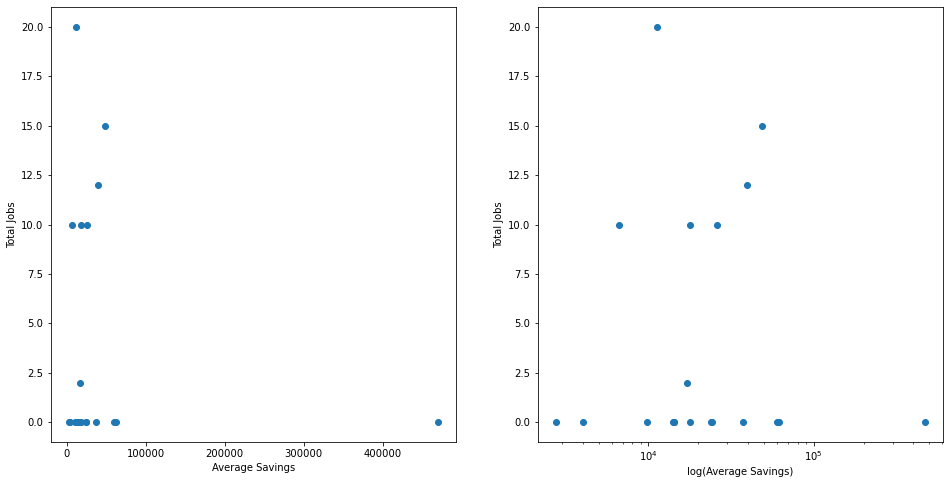

In [35]:
# Extract data and create figure
x = nta_stat['average_savings']
y = nta_stat['total_jobs']
plt.rcParams["figure.figsize"] = (16, 8)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Standard scale
ax1.scatter(x, y)
ax1.set_xlabel('Average Savings');
ax1.set_ylabel('Total Jobs');

# Logarithmic scale
ax2.scatter(x, y)
ax2.set_xscale('log')
ax2.set_xlabel('log(Average Savings)');
ax2.set_ylabel('Total Jobs');

- Histogram of the log of the average total savings.

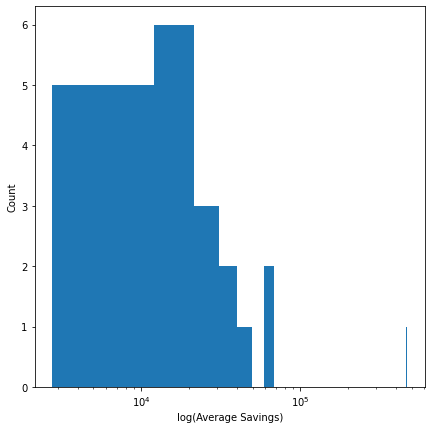

In [37]:
plt.rcParams["figure.figsize"] = (7,7)
fig, ax1 = plt.subplots()
ax1.hist(x, bins=50)
ax1.set_xscale('log')
ax1.set_xlabel('log(Average Savings)');
ax1.set_ylabel('Count');

- Line plot of the total jobs created for each month.

In [67]:
# Determine month of job start
import datetime as dt
df['month'] = pd.to_datetime(df['effective_date']).dt.month
df_monthly = df.groupby('month').sum()

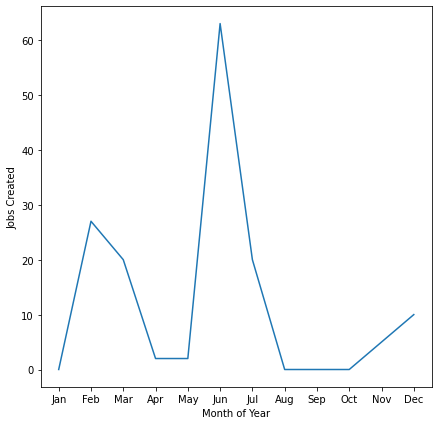

In [66]:
# Create line plot
x = df_monthly.index
y = df_monthly['job_created']
fig, ax1 = plt.subplots()
plt.plot(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels([dt.datetime.strftime(dt.datetime.strptime(str(month), "%m"), '%b') for month in x])
ax1.set_xlabel('Month of Year');
ax1.set_ylabel('Jobs Created');